In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [14]:
mat_grp_mapping = pd.read_excel("Dataset/Verusend mat grp mapping to category.xlsx",header = 1)

In [15]:
mat_grp_mapping.columns

Index(['Unnamed: 0', 'Category L1', 'material_group'], dtype='object')

In [16]:
mat_grp_mapping.drop(columns = ['Unnamed: 0'],axis = 0,inplace = True)

In [17]:
mat_grp_mapping['Category L1'].unique() # 34 labels

array([nan, 'Abrasives', 'BPT', 'Chemicals', 'Construction',
       'Direct Materials', 'Electrical Supplies', 'Fasteners', 'Fuels',
       'GMS', 'HYD & PNE', 'Industrial Gases', 'Instrumentation',
       'LOGISTICS', 'Logistics', 'Lubrication', 'Machine Clothing',
       'Machine Rolls', 'Material Handling', 'Motors', 'OEM',
       'Office Supplies', 'OPEN', 'Open', 'Packaging', 'Paints', 'PPE',
       'Pumps', 'PVF', 'Safety', 'safety', 'Service', 'Tools', 'Valves'],
      dtype=object)

## Text Cleaning and Pre-processing

In [18]:
import pandas as pd
import re
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import multiprocessing

def clean_data(text):
    cleaned = re.sub(r'[?|!|\'|"|#|-]',r'',text)
    cleaned = re.sub(r'[.|,|)|(|\|/|-]',r' ',cleaned)
    cleaned = ''.join((x for x in cleaned if not x.isdigit()))
    return cleaned


def change_lower(text):
    text = text.lower()
    return text

stopwords_list = stopwords.words("english")
def remover(text):
    text_tokens = text.split(" ")
    final_list = [word for word in text_tokens if not word in stopwords_list]
    text = ' '.join(final_list)
    return text

def get_w2vdf(df):
    w2v_df = pd.DataFrame(df["material_descriptions"]).values.tolist()
    for i in range(len(w2v_df)):
        w2v_df[i] = w2v_df[i][0].split(" ")
    return w2v_df

def train_w2v(w2v_df):
    cores = multiprocessing.cpu_count()
    w2v_model = Word2Vec(min_count=5,
                         window=2,
                         #size=300, 
                         alpha=0.03, 
                         min_alpha=0.0007, 
                         sg = 1,
                         workers=cores-1)
    w2v_model.build_vocab(w2v_df, progress_per=100)
    w2v_model.train(w2v_df, total_examples=w2v_model.corpus_count, epochs=100, report_delay=1)
    return w2v_model

In [19]:
mat_grp_mapping[['Category L1']] = mat_grp_mapping[['Category L1']].astype(str)
mat_grp_mapping['Category L1'] = mat_grp_mapping['Category L1'].apply(change_lower)
mat_grp_mapping['Category L1'] = mat_grp_mapping['Category L1'].apply(clean_data)
mat_grp_mapping['Category L1'] = mat_grp_mapping['Category L1'].apply(remover)

mat_grp_mapping[['material_group']] = mat_grp_mapping[['material_group']].astype(str)
mat_grp_mapping['material_group'] = mat_grp_mapping['material_group'].apply(change_lower)
mat_grp_mapping['material_group'] = mat_grp_mapping['material_group'].apply(clean_data)
mat_grp_mapping['material_group'] = mat_grp_mapping['material_group'].apply(remover)

In [20]:
mat_grp_mapping['Category L1'].unique() # 31 Unique Labels 

array(['nan', 'abrasives', 'bpt', 'chemicals', 'construction',
       'direct materials', 'electrical supplies', 'fasteners', 'fuels',
       'gms', 'hyd & pne', 'industrial gases', 'instrumentation',
       'logistics', 'lubrication', 'machine clothing', 'machine rolls',
       'material handling', 'motors', 'oem', 'office supplies', 'open',
       'packaging', 'paints', 'ppe', 'pumps', 'pvf', 'safety', 'service',
       'tools', 'valves'], dtype=object)

In [21]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Category L1'. 
mat_grp_mapping['Category']= label_encoder.fit_transform(mat_grp_mapping['Category L1']) 
#mat_grp_mapping.drop(columns = ['Category L1'],axis = 0,inplace = True)
print(mat_grp_mapping.head())

  Category L1             material_group  Category
0         nan                 lift plugs        18
1         nan                tool joints        18
2         nan           oil saver rubber        18
3         nan       slickline blow plugs        18
4         nan  plastic thread protectors        18


In [22]:
mat_grp_mapping['Category L1'].value_counts()

bpt                    341
nan                    244
tools                  195
pvf                    178
gms                    158
electrical supplies    157
oem                     84
hyd & pne               62
open                    56
abrasives               51
valves                  49
instrumentation         46
ppe                     46
pumps                   36
fasteners               33
lubrication             32
logistics               28
safety                  27
material handling       24
office supplies         21
motors                  18
packaging               14
chemicals               13
paints                  13
service                 10
direct materials         4
fuels                    3
industrial gases         2
construction             2
machine rolls            2
machine clothing         2
Name: Category L1, dtype: int64

In [23]:
mat_grp_mapping['Concat'] = mat_grp_mapping['Category L1'] +' ' + mat_grp_mapping['material_group']

In [54]:
w2v_df_A = get_w2vdf(mat_grp_mapping)
w2v = train_w2v(w2v_df_A)

In [83]:
w2v_model_A.wv[w2v.wv.key_to_index]

array([[ 0.01402894,  0.22800685,  0.31729966, ..., -0.3559781 ,
        -0.09823251,  0.48805434],
       [-0.18732104,  0.15526517, -0.21636114, ..., -0.25893566,
        -0.04730947,  0.20317288],
       [-0.07940768, -0.06670542, -0.18311349, ..., -0.02291127,
         0.62238026, -0.0508551 ],
       ...,
       [-0.03003881,  0.6147615 ,  0.08912762, ...,  0.1686487 ,
        -0.35061374, -0.16644573],
       [-0.46267   ,  0.02970837, -0.09329518, ..., -0.11208642,
         0.06522038,  0.02664695],
       [ 0.15480039,  0.4696373 ,  0.12379982, ..., -0.01600337,
         0.02424768,  0.14716965]], dtype=float32)

In [89]:
# word = 'valves'
# tot_words = [word] + [tupla[0] for tupla in 
#                      w2v_model_A.wv.most_similar(word, topn=10)]
# X = w2v_model_A.wv[tot_words]
X = w2v_model_A.wv[w2v.wv.key_to_index]
pca = PCA(n_components=2)

result = pca.fit_transform(X)
plt.figure(figsize=(25, 25))
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(w2v.wv.key_to_index)

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

In [56]:
w2v.wv.most_similar(positive=["abrasives"])

[('discs', 0.9260363578796387),
 ('brushes', 0.8856795430183411),
 ('pads', 0.8619765639305115),
 ('abrasive', 0.8554378747940063),
 ('adhesive', 0.8481511473655701),
 ('wheels', 0.8472635746002197),
 ('rolls', 0.7158913612365723),
 ('end', 0.6309236288070679),
 ('belts', 0.6121760606765747),
 ('acc', 0.5943887829780579)]

In [57]:
w2v.wv.most_similar(positive=["valves"])

[('flow', 0.6954655647277832),
 ('control', 0.6809960603713989),
 ('kit', 0.6766587495803833),
 ('handle', 0.6672322750091553),
 ('ring', 0.6599251627922058),
 ('valve', 0.6470315456390381),
 ('plug', 0.6188517212867737),
 ('rings', 0.6173689961433411),
 ('gas', 0.6003612279891968),
 ('switch', 0.5997695326805115)]

In [130]:
w2v.wv.most_similar(positive=["tools"])

[('bits', 0.7311187386512756),
 ('acc', 0.695567786693573),
 ('saw', 0.6790035963058472),
 ('tool', 0.6599080562591553),
 ('drill', 0.6241861581802368),
 ('pliers', 0.615090012550354),
 ('socket', 0.6130845546722412),
 ('taps', 0.5764433741569519),
 ('storage', 0.5585520267486572),
 ('drivers', 0.5518568754196167)]

In [24]:
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing

In [118]:
def plot(word):
    fig = plt.figure()
    ## word embedding
    tot_words = [word] + [tupla[0] for tupla in 
                     w2v_model_A.wv.most_similar(word, topn=5)]
    X = w2v_model_A.wv[tot_words]
    ## pca to reduce dimensionality from 300 to 3
    pca = manifold.TSNE(perplexity=4, n_components=3, init='pca')
    X = pca.fit_transform(X)
    ## create dtf
    dtf_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"])
    dtf_["input"] = 0
    dtf_["input"].iloc[0:1] = 1
    ## plot 3d
    from mpl_toolkits.mplot3d import Axes3D
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(dtf_[dtf_["input"]==0]['x'], 
               dtf_[dtf_["input"]==0]['y'], 
               dtf_[dtf_["input"]==0]['z'], c="black")
    ax.scatter(dtf_[dtf_["input"]==1]['x'], 
               dtf_[dtf_["input"]==1]['y'], 
               dtf_[dtf_["input"]==1]['z'], c="red")
    ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], 
           yticklabels=[], zticklabels=[])
    for label, row in dtf_[["x","y","z"]].iterrows():
        x, y, z = row
        ax.text(x, y, z, s=label)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_33055/3755648286.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf_["input"].iloc[0:1] = 1


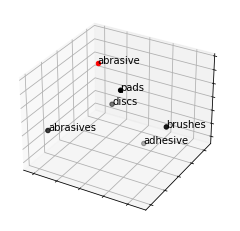

In [119]:
plot('abrasive')

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_33055/3755648286.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf_["input"].iloc[0:1] = 1


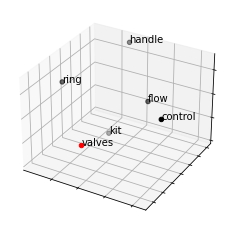

In [120]:
plot('valves')

In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

from scipy.stats import multivariate_normal as mvn

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
data = mat_grp_mapping['material_group']


tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [27]:
tf_idf 

<1951x1542 sparse matrix of type '<class 'numpy.float64'>'
	with 4348 stored elements in Compressed Sparse Row format>

In [28]:
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names()).head()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


abrasive  abrasives  absorbent  absorbents  absorber   ac  acc  acces  \
0       0.0        0.0        0.0         0.0       0.0  0.0  0.0    0.0   
1       0.0        0.0        0.0         0.0       0.0  0.0  0.0    0.0   
2       0.0        0.0        0.0         0.0       0.0  0.0  0.0    0.0   
3       0.0        0.0        0.0         0.0       0.0  0.0  0.0    0.0   
4       0.0        0.0        0.0         0.0       0.0  0.0  0.0    0.0   

   access  accessorie  ...  wraparound  wrapping  wrench  wrenches  wrm   xh  \
0     0.0         0.0  ...         0.0       0.0     0.0       0.0  0.0  0.0   
1     0.0         0.0  ...         0.0       0.0     0.0       0.0  0.0  0.0   
2     0.0         0.0  ...         0.0       0.0     0.0       0.0  0.0  0.0   
3     0.0         0.0  ...         0.0       0.0     0.0       0.0  0.0  0.0   
4     0.0         0.0  ...         0.0       0.0     0.0       0.0  0.0  0.0   

   xring  xxh  xyz  yoke  
0    0.0  0.0  0.0   0.0  
1    0.0  0.0  0.0   0.0  
2    0.0  0.0  0.0   0.0  
3    0.0  0.0  0.0   0.0  
4    0.0  0.0  0.0   0.0  

[5 rows x 1542 columns]

In [29]:
from sklearn.cluster import KMeans
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)


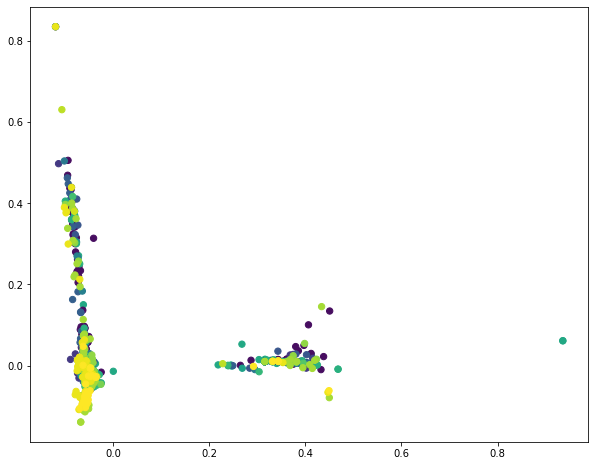

In [30]:
plt.figure(figsize = (10,8))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c =mat_grp_mapping.Category ,s=40, cmap='viridis', zorder=2)
plt.show()

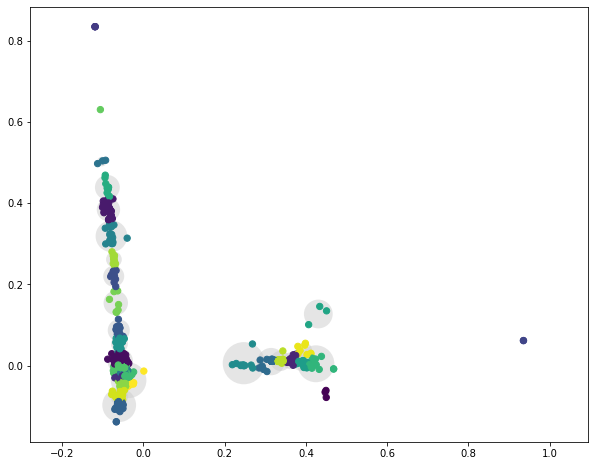

In [31]:
kmeans = KMeans(n_clusters=30, max_iter=600, algorithm = 'lloyd')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)


plt.figure(figsize = (10,8))
from scipy.spatial.distance import cdist
def plot_kmeans(kmeans, X, n_clusters=30, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
        
plot_kmeans(kmeans, Y_sklearn)

In [32]:
class GMM:
    """ Gaussian Mixture Model
    
    Parameters
    -----------
        k: int , number of gaussian distributions
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithm, default: 200
        
    Attributes
    -----------
       centroids: array, k, number_features
       
       cluster_labels: label for each data point
       
    """
    def __init__(self, C, n_runs):
        self.C = C # number of Guassians/clusters
        
        self.n_runs = n_runs
        
    
    def get_params(self):
        return (self.mu, self.pi, self.sigma)
    
    
        
    def calculate_mean_covariance(self, X, prediction):
        """Calculate means and covariance of different
            clusters from k-means prediction
        
        Parameters:
        ------------
        prediction: cluster labels from k-means
        
        X: N*d numpy array data points 
        
        Returns:
        -------------
        intial_means: for E-step of EM algorithm
        
        intial_cov: for E-step of EM algorithm
        
        """
        d = X.shape[1]
        labels = np.unique(prediction)
        self.initial_means = np.zeros((self.C, d))
        self.initial_cov = np.zeros((self.C, d, d))
        self.initial_pi = np.zeros(self.C)
        
        counter=0
        for label in labels:
            ids = np.where(prediction == label) # returns indices
            self.initial_pi[counter] = len(ids[0]) / X.shape[0]
            self.initial_means[counter,:] = np.mean(X[ids], axis = 0)
            de_meaned = X[ids] - self.initial_means[counter,:]
            Nk = X[ids].shape[0] # number of data points in current gaussian
            self.initial_cov[counter,:, :] = np.dot(self.initial_pi[counter] * de_meaned.T, de_meaned) / Nk
            counter+=1
        assert np.sum(self.initial_pi) == 1    
            
        return (self.initial_means, self.initial_cov, self.initial_pi)
    
    
    
    def _initialise_parameters(self, X):
        """Implement k-means to find starting
            parameter values.
            https://datascience.stackexchange.com/questions/11487/how-do-i-obtain-the-weight-and-variance-of-a-k-means-cluster
        Parameters:
        ------------
        X: numpy array of data points
        
        Returns:
        ----------
        tuple containing initial means and covariance
        
        _initial_means: numpy array: (C*d)
        
        _initial_cov: numpy array: (C,d*d)
        
        
        """
        n_clusters = self.C
        kmeans = KMeans(n_clusters= n_clusters, init="k-means++", max_iter=500, algorithm = 'lloyd')
        fitted = kmeans.fit(X)
        prediction = kmeans.predict(X)
        self._initial_means, self._initial_cov, self._initial_pi = self.calculate_mean_covariance(X, prediction)
        
        
        return (self._initial_means, self._initial_cov, self._initial_pi)
            
        
        
    def _e_step(self, X, pi, mu, sigma):
        """Performs E-step on GMM model
        Parameters:
        ------------
        X: (N x d), data points, m: no of features
        pi: (C), weights of mixture components
        mu: (C x d), mixture component means
        sigma: (C x d x d), mixture component covariance matrices
        Returns:
        ----------
        gamma: (N x C), probabilities of clusters for objects
        """
        N = X.shape[0] 
        self.gamma = np.zeros((N, self.C))

        const_c = np.zeros(self.C)
        
        
        self.mu = self.mu if self._initial_means is None else self._initial_means
        self.pi = self.pi if self._initial_pi is None else self._initial_pi
        self.sigma = self.sigma if self._initial_cov is None else self._initial_cov

        for c in range(self.C):
            # Posterior Distribution using Bayes Rule
            self.gamma[:,c] = self.pi[c] * mvn.pdf(X, self.mu[c,:], self.sigma[c])

        # normalize across columns to make a valid probability
        gamma_norm = np.sum(self.gamma, axis=1)[:,np.newaxis]
        self.gamma /= gamma_norm

        return self.gamma
    
    
    def _m_step(self, X, gamma):
        """Performs M-step of the GMM
        We need to update our priors, our means
        and our covariance matrix.
        Parameters:
        -----------
        X: (N x d), data 
        gamma: (N x C), posterior distribution of lower bound 
        Returns:
        ---------
        pi: (C)
        mu: (C x d)
        sigma: (C x d x d)
        """
        N = X.shape[0] # number of objects
        C = self.gamma.shape[1] # number of clusters
        d = X.shape[1] # dimension of each object

        # responsibilities for each gaussian
        self.pi = np.mean(self.gamma, axis = 0)

        self.mu = np.dot(self.gamma.T, X) / np.sum(self.gamma, axis = 0)[:,np.newaxis]

        for c in range(C):
            x = X - self.mu[c, :] # (N x d)
            
            gamma_diag = np.diag(self.gamma[:,c])
            x_mu = np.matrix(x)
            gamma_diag = np.matrix(gamma_diag)

            sigma_c = x.T * gamma_diag * x
            self.sigma[c,:,:]=(sigma_c) / np.sum(self.gamma, axis = 0)[:,np.newaxis][c]

        return self.pi, self.mu, self.sigma
    
    
    def _compute_loss_function(self, X, pi, mu, sigma):
        """Computes lower bound loss function
        
        Parameters:
        -----------
        X: (N x d), data 
        
        Returns:
        ---------
        pi: (C)
        mu: (C x d)
        sigma: (C x d x d)
        """
        N = X.shape[0]
        C = self.gamma.shape[1]
        self.loss = np.zeros((N, C))

        for c in range(C):
            dist = mvn(self.mu[c], self.sigma[c],allow_singular=True)
            self.loss[:,c] = self.gamma[:,c] * (np.log(self.pi[c]+0.00001)+dist.logpdf(X)-np.log(self.gamma[:,c]+0.000001))
        self.loss = np.sum(self.loss)
        return self.loss
    
    
    
    def fit(self, X):
        """Compute the E-step and M-step and
            Calculates the lowerbound
        
        Parameters:
        -----------
        X: (N x d), data 
        
        Returns:
        ----------
        instance of GMM
        
        """
        print(self.C)
        d = X.shape[1]
        self.mu, self.sigma, self.pi =  self._initialise_parameters(X)
        
        try:
            for run in range(self.n_runs):  
                self.gamma  = self._e_step(X, self.mu, self.pi, self.sigma)
                self.pi, self.mu, self.sigma = self._m_step(X, self.gamma)
                loss = self._compute_loss_function(X, self.pi, self.mu, self.sigma)
                
                if run % 10 == 0:
                    print("Iteration: %d Loss: %0.6f" %(run, loss))

        
        except Exception as e:
            print(e)
            
        
        return self
    
    
    
    
    def predict(self, X):
        """Returns predicted labels using Bayes Rule to
        Calculate the posterior distribution
        
        Parameters:
        -------------
        X: ?*d numpy array
        
        Returns:
        ----------
        labels: predicted cluster based on 
        highest responsibility gamma.
        
        """
        labels = np.zeros((X.shape[0], self.C))
        print(self.C)
        for c in range(self.C):
            labels [:,c] = self.pi[c] * mvn.pdf(X, self.mu[c,:], self.sigma[c])
            print(c)
        labels  = labels .argmax(1)
            
        return labels 
    
    def predict_proba(self, X):
        """Returns predicted labels
        
        Parameters:
        -------------
        X: N*d numpy array
        
        Returns:
        ----------
        labels: predicted cluster based on 
        highest responsibility gamma.
        
        """
        post_proba = np.zeros((X.shape[0], self.C))
        
        for c in range(self.C):
            # Posterior Distribution using Bayes Rule, try and vectorise
            post_proba[:,c] = self.pi[c] * mvn.pdf(X, self.mu[c,:], self.sigma[c])
    
        return post_proba

In [33]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        

3
Iteration: 0 Loss: 9331.303341
Iteration: 10 Loss: 9769.553795
Iteration: 20 Loss: 10137.114251
Iteration: 30 Loss: 10137.234657
Iteration: 40 Loss: 10137.234657
Iteration: 50 Loss: 10137.234657
Iteration: 60 Loss: 10137.234657
3
0
1
2


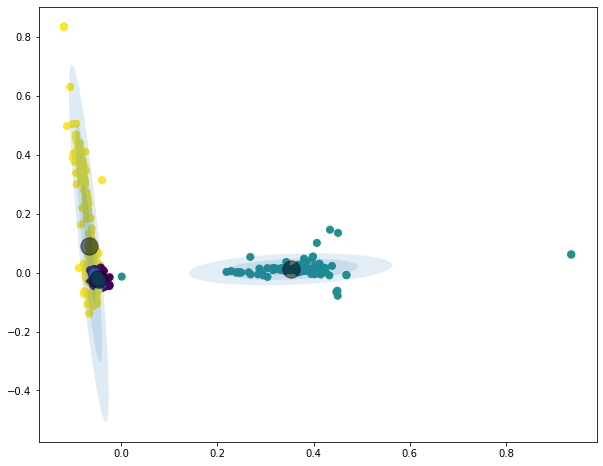

In [34]:
model = GMM(3, n_runs = 70)

fitted_values = model.fit(Y_sklearn)
predicted_values = model.predict(Y_sklearn)

# # compute centers as point of highest density of distribution
centers = np.zeros((3,2))
for i in range(model.C):
    density = mvn(cov=model.sigma[i], mean=model.mu[i]).logpdf(Y_sklearn)
    centers[i, :] = Y_sklearn[np.argmax(density)]
    
plt.figure(figsize = (10,8))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=predicted_values ,s=50, cmap='viridis', zorder=1)

plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.5, zorder=2);

w_factor = 0.2 / model.pi.max()
for pos, covar, w in zip(model.mu, model.sigma, model.pi):
    draw_ellipse(pos, covar, alpha = w)

### SKLEARN Implementation of GMM

In [47]:
from sklearn.mixture import GaussianMixture
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(Y_sklearn)
prediction_gmm = gmm.predict(Y_sklearn)
probs = gmm.predict_proba(Y_sklearn)

In [48]:
centers = np.zeros((0,2))
for i in range(3):
    density = mvn(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(Y_sklearn)
    centers[i, :] = Y_sklearn[np.argmax(density)]

plt.figure(figsize = (10,8))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction_gmm ,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.8);


IndexError: index 0 is out of bounds for axis 0 with size 0

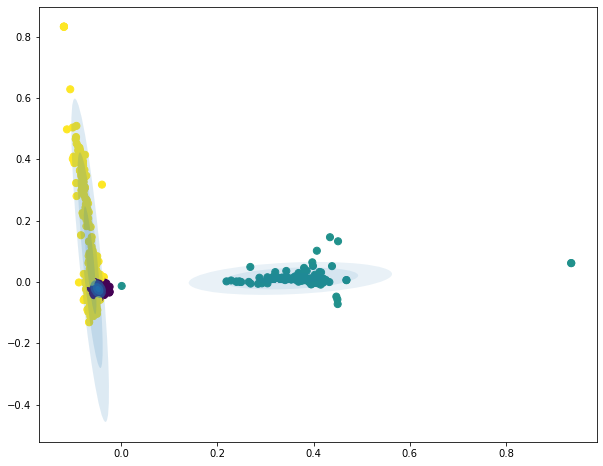

In [49]:
# diag, Gaussians are aligned with th axis
plt.figure(figsize = (10,8))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction_gmm ,s=50, cmap='viridis', zorder=1)
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

w_factor = 0.2 / gmm.weights_.max()
for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    draw_ellipse(pos, covar, alpha=w*.75)

### Perform Clustering on Material Description

In [11]:
manufacturers = pd.read_csv("Dataset/verusen_manufacturer_names_materialdetail_export_11032022.csv")
mat_grp_mapping = pd.read_excel("Dataset/Verusend mat grp mapping to category.xlsx",header = 1)
#mat_desc = pd.read_csv("Dataset/query_result_2022-11-17T22_15_15.252605Z.csv")

In [188]:
mat_desc.merge(mat_grp_mapping,how = 'left',left_on = 'material_group',right_on = 'material_group')

material_group                               material_description  \
0              24477  {"RING, CPLG GUIDE SPRING FALK 340588","SEAL K...   
1          300408031  {"SUPORTE MONT P/RELE;SIEMENS;3RU19363AA01","S...   
2            C69-700  {"HEATER              OVERLOAD","HEATER       ...   
3          120402077  {"ANEL;DO ANAL CO2 ANTON;ANTON PAAR/17522","AN...   
4            1040100  {"BEARING,BALL NO.1315 #02 (SKF)","BEARING,620...   
...              ...                                                ...   
20459        C10-290                             {"SCREW, SOCKET HEAD"}   
20460        C23-320                      {"BRONZE-SOLID        ROUND"}   
20461       27121600  {2.50CBB2ANLU18AC8.00,DSBC-80-800-PPVA-N3,ROD4...   
20462  SCREW,DRYWALL  {"SCREW,DRYWALL32158DRY WALL,BUGLE,1.625 IN,",...   
20463          69866  {"INDICATOR, BURST 6IN ZOOK BA0150-0150-01","I...   

       Unnamed: 0 Category L1  
0             NaN         NaN  
1             NaN         NaN  
2             NaN         NaN  
3             NaN         NaN  
4             NaN         NaN  
...           ...         ...  
20459         NaN         NaN  
20460         NaN         NaN  
20461         NaN         NaN  
20462         NaN         NaN  
20463         NaN         NaN  

[20464 rows x 4 columns]

In [12]:
import json
def parse_json(s):
    try:
        return json.loads(s)
    except json.JSONDecodeError:
        return None

In [13]:
from sklearn.preprocessing import LabelBinarizer
manufacturers['material_groups_new']  = manufacturers.material_groups.apply(str).apply(parse_json)
materials_manufacturer_matgrpcategories = manufacturers.explode('material_groups_new')
# Drop NONE Rows
materials_manufacturer_matgrpcategories.dropna(inplace = True)

# materials_manufacturer_matgrpcategories['vectors'] = [row for row in LabelBinarizer().fit_transform(materials_manufacturer_matgrpcategories['material_groups_new'])]
# materials_manufacturer_matgrpcategories.set_index('manufacturer_name') 

In [23]:
materials_manufacturer_matgrpcategories

manufacturer_name  num_materials  num_stock_materials  average_value  \
0                     -            102                   79     803.395539   
0                     -            102                   79     803.395539   
0                     -            102                   79     803.395539   
0                     -            102                   79     803.395539   
0                     -            102                   79     803.395539   
...                 ...            ...                  ...            ...   
71107               ZZ2             18                    6      38.385556   
71107               ZZ2             18                    6      38.385556   
71107               ZZ2             18                    6      38.385556   
71107               ZZ2             18                    6      38.385556   
71107               ZZ2             18                    6      38.385556   

                                         material_groups  \
0      ["-","-","-","-","-","-","-","-","-","-","-","...   
0      ["-","-","-","-","-","-","-","-","-","-","-","...   
0      ["-","-","-","-","-","-","-","-","-","-","-","...   
0      ["-","-","-","-","-","-","-","-","-","-","-","...   
0      ["-","-","-","-","-","-","-","-","-","-","-","...   
...                                                  ...   
71107  ["-","-","-","-","-","-","-","-","-","-","-","...   
71107  ["-","-","-","-","-","-","-","-","-","-","-","...   
71107  ["-","-","-","-","-","-","-","-","-","-","-","...   
71107  ["-","-","-","-","-","-","-","-","-","-","-","...   
71107  ["-","-","-","-","-","-","-","-","-","-","-","...   

                                   material_descriptions material_groups_new  
0      ["ELEMENT, OVRLD PROTECT, ELE-O-36PT, 33.5A,PR...                   -  
0      ["ELEMENT, OVRLD PROTECT, ELE-O-36PT, 33.5A,PR...                   -  
0      ["ELEMENT, OVRLD PROTECT, ELE-O-36PT, 33.5A,PR...                   -  
0      ["ELEMENT, OVRLD PROTECT, ELE-O-36PT, 33.5A,PR...                   -  
0      ["ELEMENT, OVRLD PROTECT, ELE-O-36PT, 33.5A,PR...                   -  
...                                                  ...                 ...  
71107  ["50-18 SPROCKETS 50B18 1bore SPLIT WITH 1/4 K...                   -  
71107  ["50-18 SPROCKETS 50B18 1bore SPLIT WITH 1/4 K...                   -  
71107  ["50-18 SPROCKETS 50B18 1bore SPLIT WITH 1/4 K...                   -  
71107  ["50-18 SPROCKETS 50B18 1bore SPLIT WITH 1/4 K...                   -  
71107  ["50-18 SPROCKETS 50B18 1bore SPLIT WITH 1/4 K...                   -  

[14020633 rows x 7 columns]

In [25]:
materials_manufacturer_matgrpcategories[materials_manufacturer_matgrpcategories['material_groups_new'] == '24477']

manufacturer_name  num_materials  num_stock_materials  \
5867                   ATRA-FLEX            220                  187   
5867                   ATRA-FLEX            220                  187   
5867                   ATRA-FLEX            220                  187   
5867                   ATRA-FLEX            220                  187   
5867                   ATRA-FLEX            220                  187   
...                          ...            ...                  ...   
57834                  SIER-BATH             50                   39   
63599  THOMAS FLEXIBLE COUPLINGS             54                   42   
63599  THOMAS FLEXIBLE COUPLINGS             54                   42   
63882            TIMKEN BEARINGS            381                  216   
68746      WEBCO ENGINEERING INC             12                   11   

       average_value                                    material_groups  \
5867      263.406803  ["COUPLING,GNRL","C85","COUPLING,FLEXIBLE",nul...   
5867      263.406803  ["COUPLING,GNRL","C85","COUPLING,FLEXIBLE",nul...   
5867      263.406803  ["COUPLING,GNRL","C85","COUPLING,FLEXIBLE",nul...   
5867      263.406803  ["COUPLING,GNRL","C85","COUPLING,FLEXIBLE",nul...   
5867      263.406803  ["COUPLING,GNRL","C85","COUPLING,FLEXIBLE",nul...   
...              ...                                                ...   
57834     316.704580  ["138000","132000","116000","138000","132000",...   
63599     706.935185  ["24471","24470","24448","24477","24471","2447...   
63599     706.935185  ["24471","24470","24448","24477","24471","2447...   
63882     376.651419  ["23362","23369","23369","23360","23366","2382...   
68746     130.333333  ["24780","35499","MS380000","MS380000","24459"...   

                                   material_descriptions material_groups_new  
5867   ["COUPLING,GNRL,M2 HUB 1-7/8,HUB, M2, 1.875\" ...               24477  
5867   ["COUPLING,GNRL,M2 HUB 1-7/8,HUB, M2, 1.875\" ...               24477  
5867   ["COUPLING,GNRL,M2 HUB 1-7/8,HUB, M2, 1.875\" ...               24477  
5867   ["COUPLING,GNRL,M2 HUB 1-7/8,HUB, M2, 1.875\" ...               24477  
5867   ["COUPLING,GNRL,M2 HUB 1-7/8,HUB, M2, 1.875\" ...               24477  
...                                                  ...                 ...  
57834  ["KIT:COMPRESSOR BOLT,NO","000000000001128075"...               24477  
63599  ["DISC PACK, CPLG TOMALOY REX 721021","BOLT, C...               24477  
63599  ["DISC PACK, CPLG TOMALOY REX 721021","BOLT, C...               24477  
63882  ["CONE, BEARING TIMKEN 48286","CUP & CONE, TIM...               24477  
68746  ["SCREW, ANTI-ROTATION WEBCO 515.1","BRACKET, ...               24477  

[140 rows x 7 columns]

In [7]:
materials_manufacturer_matgrpcategories = mat_grp_mapping.merge(materials_manufacturer_matgrpcategories,how = 'inner',left_on = 'material_group',right_on = 'material_groups_new')

In [8]:
materials_manufacturer_matgrpcategories['material_groups_new'] = materials_manufacturer_matgrpcategories['Category L1']

In [9]:
materials_manufacturer_matgrpcategories = materials_manufacturer_matgrpcategories[materials_manufacturer_matgrpcategories['material_groups_new'].notna()]

In [3]:
materials_manufacturer_matgrpcategories.columns

NameError: name 'materials_manufacturer_matgrpcategories' is not defined

In [11]:
materials_manufacturer_matgrpcategories.drop(columns = ['Unnamed: 0', 'Category L1', 'num_materials', 'num_stock_materials', 'average_value',
       'material_groups'],axis = 0,inplace = True)

In [12]:
materials_manufacturer_matgrpcategories.rename(columns ={'material_groups_new':'Category'},inplace = True)

In [13]:
materials_manufacturer_matgrpcategories.shape

(9504704, 4)

In [20]:
new_df_2 = pd.DataFrame()

In [16]:
#new_df = (materials_manufacturer_matgrpcategories[:100].groupby(['manufacturer_name','material_group','Category']).sum())

In [17]:
#All Abrasives
for i in range(0,2000,1000):
    #new_df_1.append(materials_manufacturer_matgrpcategories[i:i+1000].drop_duplicates())
    new_df_1 = pd.concat([new_df_1,materials_manufacturer_matgrpcategories[i:i+1000].drop_duplicates()], axis=0, ignore_index=True)
    new_df_1 = new_df_1.drop_duplicates(ignore_index=True)

In [21]:
# Get some Valves
for i in range(0,2000,1000):
    #new_df_1.append(materials_manufacturer_matgrpcategories[i:i+1000].drop_duplicates())
    new_df_2 = pd.concat([new_df_2,materials_manufacturer_matgrpcategories[materials_manufacturer_matgrpcategories['Category'] == 'Valves'][i:i+1000].drop_duplicates()], axis=0, ignore_index=True)
    new_df_2 = new_df_2.drop_duplicates(ignore_index=True)

In [22]:
new_df_3 = pd.concat([new_df_1,new_df_2],axis=0, ignore_index=True)

In [25]:
new_df_3[['material_descriptions']] = new_df_3[['material_descriptions']].astype(str)
new_df_3['material_descriptions'] = new_df_3['material_descriptions'].apply(change_lower)
new_df_3['material_descriptions'] = new_df_3['material_descriptions'].apply(clean_data)
new_df_3['material_descriptions'] = new_df_3['material_descriptions'].apply(remover)


In [26]:
new_df_3

material_group          manufacturer_name  \
0           8511-COATED ABRASIVES                         3M   
1   1540-LINEAR ACTUATOR & ACCESS    1ST SOURCE PRODUCTS INC   
2   1540-LINEAR ACTUATOR & ACCESS                  80/20 INC   
3   1540-LINEAR ACTUATOR & ACCESS    ABB INC AUTOMATION PROD   
4   1540-LINEAR ACTUATOR & ACCESS                   ABEK LLC   
5   1540-LINEAR ACTUATOR & ACCESS     ABZ VALVE S & CONTROLS   
6   1540-LINEAR ACTUATOR & ACCESS                   ACCURIDE   
7   1540-LINEAR ACTUATOR & ACCESS                ACCUWEB INC   
8   1540-LINEAR ACTUATOR & ACCESS           ACE CONTROLS INC   
9   1540-LINEAR ACTUATOR & ACCESS    ACE   (SHOCK ABSORBERS)   
10  1540-LINEAR ACTUATOR & ACCESS              ACME ELECTRIC   
11  1540-LINEAR ACTUATOR & ACCESS    ACTUS MANUFACTURING INC   
12  1540-LINEAR ACTUATOR & ACCESS    ADVANCED AUTOMATION CYL   
13  1540-LINEAR ACTUATOR & ACCESS            ADVANTAGE GROUP   
14  1540-LINEAR ACTUATOR & ACCESS                    AGATHON   
15  1540-LINEAR ACTUATOR & ACCESS       AIR-MITE DEVICES INC   
16  1540-LINEAR ACTUATOR & ACCESS      ALCON SOLENOID VALVES   
17  1540-LINEAR ACTUATOR & ACCESS             ALFA LAVAL INC   
18  1540-LINEAR ACTUATOR & ACCESS              ALLENAIR CORP   
19  1540-LINEAR ACTUATOR & ACCESS              ALLEN BRADLEY   
20  1540-LINEAR ACTUATOR & ACCESS                AMACOIL INC   
21  1540-LINEAR ACTUATOR & ACCESS        AMERICAN LINEAR MFG   
22  1540-LINEAR ACTUATOR & ACCESS  AMERICAN LUBRICATION EQPT   
23  1540-LINEAR ACTUATOR & ACCESS      AMERICAN-METRIC CORP.   
24  1540-LINEAR ACTUATOR & ACCESS     AMERICAN PRECISION IND   

                                material_descriptions   Category  
0   [ ventureclad heavy dutyinsulation jacketing t...  Abrasives  
1   [e \ rad x  deg uppr vert curv e drive track l...     Valves  
2   [black_double flange linear bearing brake _anc...     Valves  
3   [fep  seal ring qsaa surge arresters spboptpia...     Valves  
4   [\ diameter grade  poly ball  \ c ss gr  ball ...     Valves  
5   [ v  coil coil sz dn pn butterfly valve full l...     Valves  
6   [cp drawer slide nseace cylinder drawer slide ...     Valves  
7   [assembly brush motor  series controller digit...     Valves  
8   [sald   x sd  shock rebuild kit mat  shock abs...     Valves  
9   [ma  ace shock  shock absorber hbccn gas sprin...     Valves  
10  [hsfas ts  kva acme transformer tf transformer...     Valves  
11  [dcfbf blades  throttle control  actuator  act...     Valves  
12  [b x  nc style  cyl \ ms cyl  mto kit bx rc st...     Valves  
13  [vpci   lbs drum   stuffing horn sls chain cla...     Valves  
14  [a guide bushing w glue groved= d= d= l= heade...     Valves  
15  [x x   breather plug vpd  way hand ball valve ...     Valves  
16  [uacfvvac   \        nc valv uacpvvac din   \ ...     Valves  
17  [ seal seat  valve \ butterflviton ampgr  seal...     Valves  
18  [a x  cylinder avxntorsdsaax cs axbcepb cylind...     Valves  
19  [drive gnrl fandannnnnn v  ac   hp  ph phase m...     Valves  
20  [  torsion spring   guide bushing  guide tape ...     Valves  
21  [x  aluminum slide lp slide assm dvrsp  linear...     Valves  
22  [ pump tr grease cup red tim hand pump   greas...     Valves  
23  [  metric chain  meter box dm x   double sided...     Valves  
24  [c nt  gear head  cw   grease fitting cbccwvdc...     Valves

In [2]:
 new_df_1['material_descriptions']

NameError: name 'new_df_1' is not defined

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
data = new_df_3['material_descriptions']


tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [31]:
tf_idf

<25x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 27112 stored elements in Compressed Sparse Row format>

In [157]:
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names()).head()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


_acme  _adapter  _ball  _bearing  _bolt  _clamp  _contact  _conveyor  _cyl  \
0    0.0       0.0    0.0       0.0    0.0     0.0       0.0        0.0   0.0   
1    0.0       0.0    0.0       0.0    0.0     0.0       0.0        0.0   0.0   
2    0.0       0.0    0.0       0.0    0.0     0.0       0.0        0.0   0.0   
3    0.0       0.0    0.0       0.0    0.0     0.0       0.0        0.0   0.0   
4    0.0       0.0    0.0       0.0    0.0     0.0       0.0        0.0   0.0   

   _cylindrical  ...       zzc  zzd  zzf  zzg  zzh  zzm  zznr   çà  øelb  \
0           0.0  ...  0.000083  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
1           0.0  ...  0.000000  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
2           0.0  ...  0.000000  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
3           0.0  ...  0.000000  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
4           0.0  ...  0.000000  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   

   østreet  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  

[5 rows x 20000 columns]

In [164]:
# Categorizing the Labels
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
new_df_3['Category']= label_encoder.fit_transform(new_df_3['Category']) 

In [159]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)

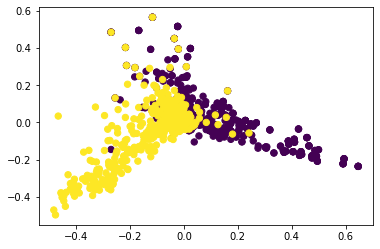

In [179]:
# Plotting Using Category Labels
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c =new_df_3.Category ,s=40, cmap='viridis', zorder=2)
#plt.legend()
plt.show()

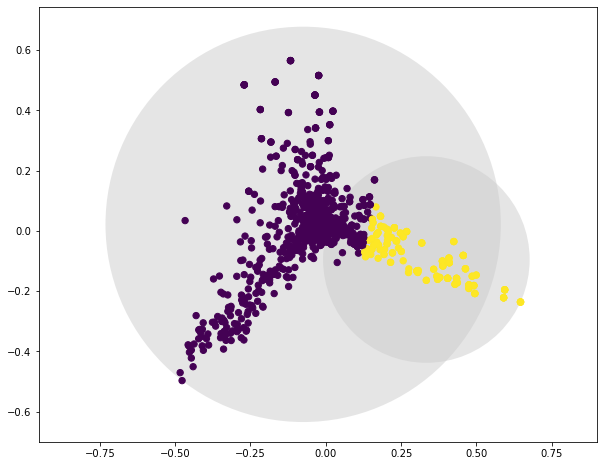

In [127]:
# Plotting K-Means 

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'lloyd')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

# Plot using Labels produced form KMeans
plt.figure(figsize = (10,8))

from scipy.spatial.distance import cdist
def plot_kmeans(kmeans, X, n_clusters=5, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
        
plot_kmeans(kmeans, Y_sklearn)

2
Iteration: 0 Loss: 766.047450
Iteration: 10 Loss: 847.674734
Iteration: 20 Loss: 847.680552
Iteration: 30 Loss: 847.680553
Iteration: 40 Loss: 847.680553
2
0
1


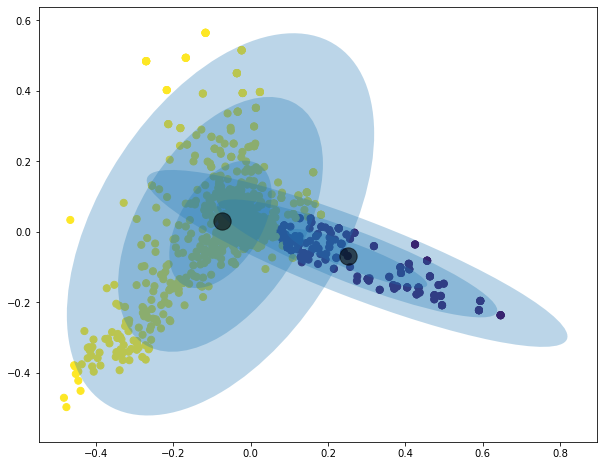

In [185]:
# Plotting GMM
model = GMM(2, n_runs = 50)

fitted_values = model.fit(Y_sklearn)
predicted_values = model.predict(Y_sklearn)

# # compute centers as point of highest density of distribution
centers = np.zeros((2,2))
for i in range(model.C):
    density = mvn(cov=model.sigma[i], mean=model.mu[i]).logpdf(Y_sklearn)
    centers[i, :] = Y_sklearn[np.argmax(density)]
    
plt.figure(figsize = (10,8))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=predicted_values ,s=50, cmap='viridis', zorder=1)

plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6, zorder=2);

w_factor = 0.3/ model.pi.max()
for pos, covar, w in zip(model.mu, model.sigma, model.pi):
    draw_ellipse(pos, covar, alpha = 0.3)